### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.

##  Insert personal information (name, surname, student id)

# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [1]:
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
!pip install gdown # Install the gdown library if not already installed
import gdown # Import the gdown library
import pandas as pd # Import pandas for data manipulation


file_id = '1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an'  # Extract the file ID from the shared link

# Generate the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file to a temporary location
output_file = 'downloaded_data.csv' # You can change this to your preferred filename
gdown.download(url, output_file, quiet=False)

# Read the downloaded CSV into a pandas DataFrame
df = pd.read_csv(output_file, encoding="utf-8")  # Assuming it's a CSV file

df #to display the DataFrame


Downloading...
From: https://drive.google.com/uc?id=1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an
To: /content/downloaded_data.csv
100%|██████████| 531k/531k [00:00<00:00, 98.5MB/s]


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,28,9.0,0,2.0,1,1055,1,1,1.0,28,1,196,1,-1,0,0.0,1
1,36,4.0,1,2.0,1,520,2,1,0.0,23,5,110,2,-1,0,0.0,1
2,38,2.0,0,3.0,1,1314,2,2,1.0,16,7,378,2,-1,0,0.0,1
3,41,9.0,1,3.0,1,28,2,1,1.0,4,2,358,2,-1,0,0.0,1
4,27,2.0,0,3.0,1,290,1,1,1.0,10,8,88,1,-1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,73,5.0,1,2.0,1,2850,1,1,1.0,17,11,300,1,40,8,1.0,2
10574,25,2.0,0,2.0,1,505,1,2,1.0,17,11,386,2,-1,0,0.0,2
10575,51,2.0,1,3.0,1,825,1,1,1.0,17,11,977,3,-1,0,0.0,2
10576,71,5.0,2,1.0,1,1729,1,1,1.0,17,11,456,2,-1,0,0.0,2


### 2. calculate correlation between target variable 'y' and other features (5 points)

In [3]:
correlation_matrix = df.corr()

In [4]:
correlation_with_y = correlation_matrix['y'] # calculate correlation between target variable 'y'


# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choose the two most correlated features with target feature 'y'

In [5]:
# X=df[[feature1, feature2]]
#y=df['y']
correlation_with_y.sort_values(ascending=False) #duration , poutcome

,y
y,1.000000
duration,0.443087
poutcome,0.291850
contact,0.219086
pdays,0.153807
balance,0.088308
previous,0.087656
education,0.082672
age,0.040038
month,0.031213


In [6]:
X = df[['duration','poutcome']] #Most correlated 2 features with y
y = df['y']-1 # Convert y values to sigmoid class values
y.tail()

,y
10573,1
10574,1
10575,1
10576,1
10577,1


###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In [7]:
class LogisticRegression: # Class for logistic regression

    def __init__(self, learning_rate=0.01, epochs=1000): #Initializer
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y): #Training function with logistic regression
        # Initialize weights with zeros and bias with 0
        self.weights = np.zeros(X[1].shape , dtype=np.float64)  # Initialize with zeros, not None
        self.bias = 0

        for _ in range(self.epochs):
            weight_crr = np.zeros(X[1].shape, dtype=np.float64)  # Initialize weight changes
            bias_crr = 0  # Initialize bias change

            for i in range(len(X)):

                prediction = self.sigmoid(np.dot(X[i], self.weights) + self.bias) # Models class prediction
                error = prediction - y[i]  # Formula's error
                # Compute gradients
                weight_crr += error * X[i] # Gradient descent for w
                bias_crr += error #Gradient descent for b

            # Update weights and bias
            self.weights -= self.learning_rate * weight_crr / len(X) # Update weight with avarage of indices
            self.bias -= self.learning_rate * bias_crr / len(X) # Update bias with avarage of indices
        return self


    def sigmoid(self, z): # Activation function
        return 1 / (1 + np.exp(-z))

    def predict(self, X):

      prediction = np.dot(X, self.weights) + self.bias # Predict value
      prediction = np.array(prediction) # Convert type

      # Apply activation function

      prediction[prediction >= 0.5] = 1
      prediction[prediction < 0.5] = 0
      # Returns np array
      return prediction


In [8]:
model = LogisticRegression() # Create object for model

Split the dataset into a training set and a validation set (80% training and 20% validation).

In [9]:
# Become np array
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split

Scale the features using StandardScaler

In [11]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

* Initialize and train the custom logistic regression model

In [12]:
model.fit(X_train, y_train) # Train the model

* Make predictions on the validation set

In [13]:
y_pred = model.predict(X_test) # Make predictions

### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [14]:
cm = confusion_matrix(y_test, y_pred)
#Confusion Matrix
print(cm)

report = classification_report(y_test, y_pred)
# Classification Matrix
print(report)

[[992 100]
 [481 543]]
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77      1092
         1.0       0.84      0.53      0.65      1024

    accuracy                           0.73      2116
   macro avg       0.76      0.72      0.71      2116
weighted avg       0.76      0.73      0.71      2116



### Print decision boundaries as in PA1 (5 points)

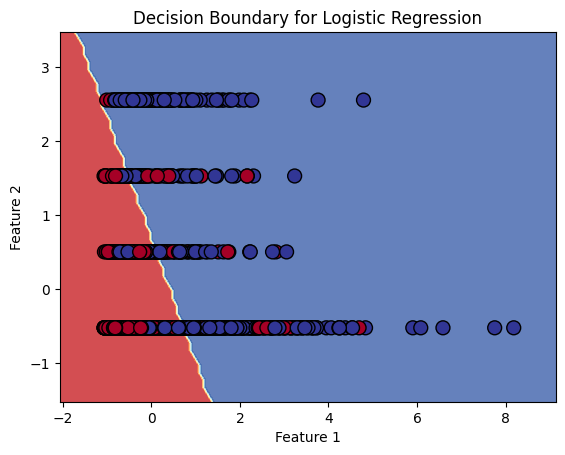

In [15]:
def plt_decision_boundary(X, y, model):  # Illustrate decision boundary from a given model
    # Define the range of the grid based on the feature values in X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Range for the first feature
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Range for the second feature

    # Create a mesh grid for the feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict using model for grid points
    Z = np.array(Z).reshape(xx.shape)  # Reshape predictions to match grid shape

    # Plot the decision boundary using contour plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Scatter plot for the actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o',
                s=100, cmap=plt.cm.RdYlBu)

    # Add plot details
    plt.title('Decision Boundary for Logistic Regression')  # Title of the plot
    plt.xlabel('Feature 1')  # Label for x-axis
    plt.ylabel('Feature 2')  # Label for y-axis
    plt.show()  # Display the plot

    return xx.ravel(), yy.ravel()  # Return the flattened grid coordinates

# Print decision boundaries as in PA1
dec_boundry_x, dec_boundry_y = plt_decision_boundary(X_test, y_test, model) # Decision boundries values assigned to two arrays that I utilize in next blocks

# 1.2 Implementing Logistic Regression using all features.

* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [16]:
y = df[['y']]-1 # Convert y values to sigmoid class values
X = df.drop('y', axis=1) # All features without y
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)# Change type

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split

* Scale the features using StandardScaler

In [18]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

### Initialize and train the custom logistic regression model.

In [19]:
model2 = LogisticRegression() # Train another model with all features
model2.fit(X_train, y_train)

* Make predictions on the validation set

In [20]:
y_pred = model2.predict(X_test) # Make predictions

### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [21]:
cm = confusion_matrix(y_test, y_pred)
# Confusion
print(cm)

report = classification_report(y_test, y_pred)
# Classification
print(report)

[[977 115]
 [419 605]]
              precision    recall  f1-score   support

         0.0       0.70      0.89      0.79      1092
         1.0       0.84      0.59      0.69      1024

    accuracy                           0.75      2116
   macro avg       0.77      0.74      0.74      2116
weighted avg       0.77      0.75      0.74      2116



### Print decision boundaries as in PA1. Briefly explain the impact of the number of features on the learning ability of the model. (5 points)

Splitting data with fewer features reduces the dimensionality of the subspace. In such lower-dimensional spaces, the ability to separate data may diminish because certain separable patterns or structures in higher dimensions may not be evident in the reduced subspace.

In [22]:
x_values = dec_boundry_x # Plt functions output
y_values = dec_boundry_y
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)

In [23]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification


svm_model = SVC(kernel='linear', random_state=42) # Create SVM model
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test) # Make predictions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
print("SVM - Classification Report")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

report = classification_report(y_test, y_pred_svm)
print(report)

SVM - Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      1092
         1.0       0.78      0.78      0.78      1024

    accuracy                           0.79      2116
   macro avg       0.79      0.79      0.79      2116
weighted avg       0.79      0.79      0.79      2116

[[872 220]
 [225 799]]
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      1092
         1.0       0.78      0.78      0.78      1024

    accuracy                           0.79      2116
   macro avg       0.79      0.79      0.79      2116
weighted avg       0.79      0.79      0.79      2116



# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in this task

In [25]:
X , y # There is no change to former X , y

(array([[ 28.,   9.,   0., ...,  -1.,   0.,   0.],
        [ 36.,   4.,   1., ...,  -1.,   0.,   0.],
        [ 38.,   2.,   0., ...,  -1.,   0.,   0.],
        ...,
        [ 51.,   2.,   1., ...,  -1.,   0.,   0.],
        [ 71.,   5.,   2., ...,  -1.,   0.,   0.],
        [ 72.,   5.,   1., ..., 184.,   3.,   3.]]),
 array([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]]))

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Scale the features using StandardScaler

In [27]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)

#### Implement GridSearchCV  (5 points)

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel types
    'gamma': ['scale', 'auto']   # Kernel coefficient options
}

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=SVC(),       # SVC model as the estimator
    param_grid=param_grid, # Hyperparameter grid to search
    scoring='accuracy',    # Metric
    cv=5,                  # 5-fold
    verbose=1,             # Display progress of grid search
    n_jobs=-1
)

# Train the model using the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [29]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.8304187455228664


* Initialize the SVM classifier

In [30]:
# Extract the best model from grid search
svm_best_model = grid_search.best_estimator_

* Train the SVM classifier with the best parameters found from grid search




In [31]:
# Train the model (already trained by GridSearchCV, but we can confirm)
svm_best_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma='auto')

* Make predictions on the validation set using the best model


In [32]:
# Make predictions on the validation set
y_pred = svm_best_model.predict(X_test)

#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))


Validation Accuracy: 0.82
[[869 223]
 [152 872]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1092
         1.0       0.80      0.85      0.82      1024

    accuracy                           0.82      2116
   macro avg       0.82      0.82      0.82      2116
weighted avg       0.82      0.82      0.82      2116



## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y'

In [34]:
X = df[['duration','poutcome']] # Values from part 1
y = df['y']-1
y
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Scale the features using StandardScaler

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [37]:
from sklearn.svm import SVC

def svm_grid_search(X_train, y_train):
  grid_search.fit(X_train, y_train)

  # Get the best parameters from GridSearchCV
  best_params = grid_search.best_params_

  # Initialize SVM classifier with the best parameters
  svm_best_model = SVC(C=best_params['C'], kernel=best_params['kernel'])

  # If the kernel is 'poly' or 'rbf', you can add additional parameters like gamma and degree
  if best_params['kernel'] == 'poly':
      svm_best_model = SVC(C=best_params['C'], kernel=best_params['kernel'], degree=best_params['degree'])
  elif best_params['kernel'] == 'rbf':
      svm_best_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])

  return svm_best_model

# SVM model initialized successfully
svm_best_model = svm_grid_search(X_train, y_train)
print(svm_best_model)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC(C=0.1)


* Train the SVM classifier

In [38]:
svm_best_model.fit(X_train, y_train)

SVC(C=0.1)

* Make predictions on the validation set

In [39]:
y_pred = svm_best_model.predict(X_test)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78      1092
         1.0       0.78      0.71      0.74      1024

    accuracy                           0.76      2116
   macro avg       0.77      0.76      0.76      2116
weighted avg       0.77      0.76      0.76      2116


Confusion Matrix:
[[890 202]
 [297 727]]


##### Visualize decision boundary and support vectors (5 points)

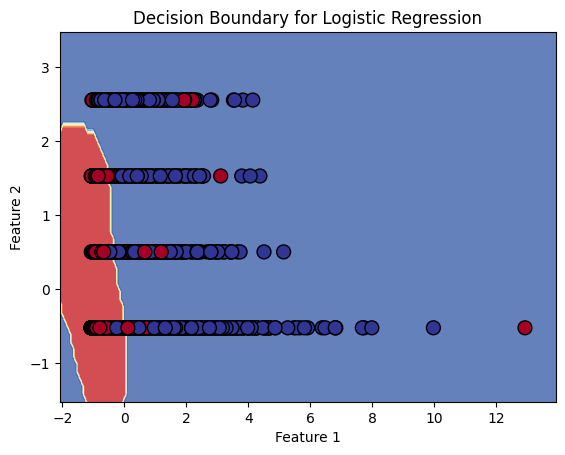

(array([-2.08110485, -1.98110485, -1.88110485, ..., 13.71889515,
        13.81889515, 13.91889515]),
 array([-1.52400361, -1.52400361, -1.52400361, ...,  3.47599639,
         3.47599639,  3.47599639]))

In [41]:
plt_decision_boundary(X_train, y_train, svm_best_model)

## 2.3 implementing svm with least correlated 2 features (10 points)

#### Choose the two least correlated features with target feature 'y'

In [42]:
X = df[['month','job']] # Least correlated features with y
y = df['y']-1
y
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Scale the features using StandardScaler

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [45]:
svm_best_model = svm_grid_search(X_train, y_train) # Grid search function

print(svm_best_model)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC(C=10)


* Train the SVM classifier

In [46]:
svm_best_model.fit(X_train, y_train)

SVC(C=10)

* Make predictions on the validation set

In [47]:
y_pred = svm_best_model.predict(X_test)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [48]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.69      0.64      1092
         1.0       0.60      0.51      0.55      1024

    accuracy                           0.60      2116
   macro avg       0.60      0.60      0.60      2116
weighted avg       0.60      0.60      0.60      2116

[[751 341]
 [505 519]]


##### Visualize decision boundary and support vectors(5 points)

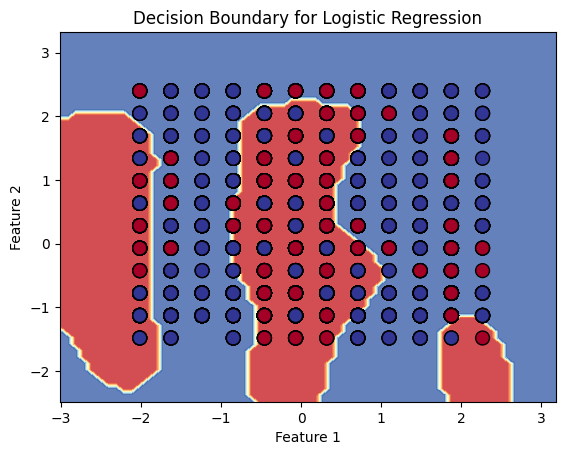

(array([-3.01768384, -2.91768384, -2.81768384, ...,  2.98231616,
         3.08231616,  3.18231616]),
 array([-2.47972409, -2.47972409, -2.47972409, ...,  3.32027591,
         3.32027591,  3.32027591]))

In [49]:
plt_decision_boundary(X_train, y_train, svm_best_model)

# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing

### import other necessary libraries

In [50]:
file_id = '1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv'

# Generate the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file to a temporary location
output_file = 'downloaded_data.csv' # or any preferred name
gdown.download(url, output_file, quiet=False)

# Read the downloaded CSV into a pandas DataFrame
import pandas as pd # Import pandas for data manipulation
df_t = pd.read_csv(output_file, encoding="utf-8")

df_t.head()

Downloading...
From: https://drive.google.com/uc?id=1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv
To: /content/downloaded_data.csv
100%|██████████| 867k/867k [00:00<00:00, 154MB/s]


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1988-1994,1,20 years and over,1.0,41.6,0.8,NaN
1,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1999-2002,2,20 years and over,1.0,33.0,0.8,NaN
2,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2001-2004,3,20 years and over,1.0,32.3,0.7,NaN
3,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2003-2006,4,20 years and over,1.0,31.6,0.8,NaN
4,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2005-2008,5,20 years and over,1.0,30.8,0.7,NaN


* Define features and target variable, you will use all features of dataset in this task

In [51]:
y_features = df[['y']]-1
X_features = df.drop('y', axis=1)
X = np.array(X_features, dtype=np.float64)
y = np.array(y_features, dtype=np.float64)

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Initialize the Decision Tree classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

* Train the Decision Tree classifier

In [54]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

* Make predictions on the validation set

In [55]:
y_pred = dt_model.predict(X_test)

#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)

In [56]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78      1092
         1.0       0.76      0.79      0.78      1024

    accuracy                           0.78      2116
   macro avg       0.78      0.78      0.78      2116
weighted avg       0.78      0.78      0.78      2116


Confusion Matrix:
[[839 253]
 [215 809]]


#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


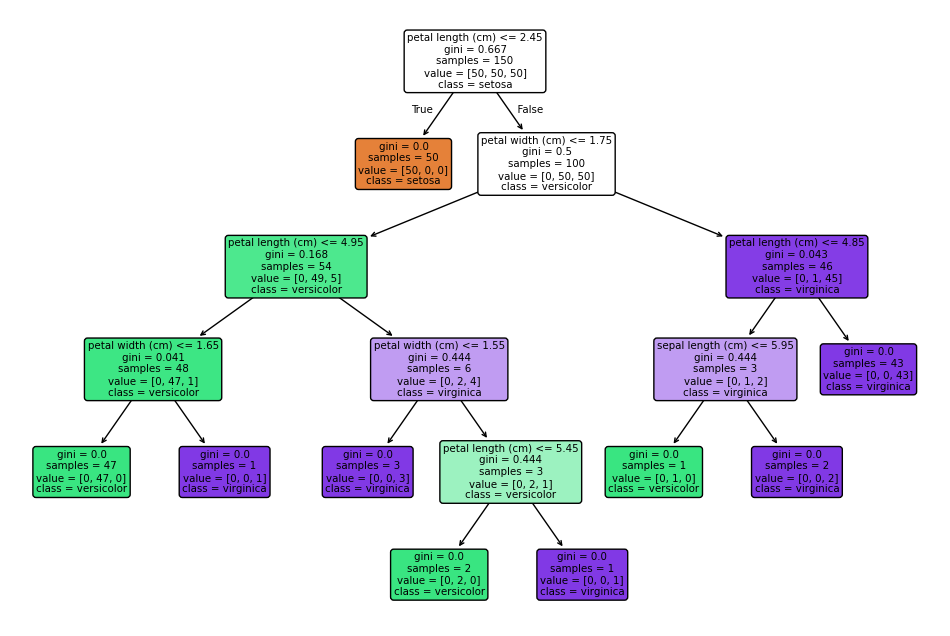

In [62]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)  # Limit the depth for clarity
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(clf,
          feature_names=data.feature_names,  # Display feature names
          class_names=data.target_names,    # Display target class names
          filled=True,                      # Fill nodes with colors based on class proportions
          rounded=True,                     # Use rounded node shapes
          impurity=True)                    # Show Gini impurity values in the nodes
plt.show()



### Explain briefly the question. What is the role of gini in decision tree? (10 points)

The Gini index is a metric used in decision trees to measure the degree of impurity or disorder in a dataset. It helps the tree decide the best split at each node by evaluating how well a split separates the data into distinct classes.